# How to analyze uncertainty? 
## Interesting salary trends on Stack Overflows survey 2020


## 1. Introduction

When you are solving what is the average salary for a developer type you’ll cross with this observation: Dataset has 23 different developer categories but this is a multiple-choice question so respondents can choose all that applies. This means for example that one respondent can have many developer types listed. There were 8269 different answer types (23 categories + 8264 different combinations of those categories). So how can you exactly tell, which salary is meant for each developer type?

Stack Overflow makes an Annual Developer Survey to their developer community. In 2020 
with nearly 65,000 responses fielded from over 180 countries, their survey examines all aspects of the developer experience from technologies to education and salary levels.

In this notebook I will be exploring the 2020 Stack Overflow public survey. My study question will we be focused on technologies (languages), developer types salary and education. Main target group are those developers who describe themselves as professionals.

During the exploring phase I noticed interesting things in when respondents gave their answers for salary. This observation led me to examine salary question more deeply.

There will be three study questions:

- What are the most common languages used by professionals?
- What is the average salary for each developer type?
- How does education compare to salary?


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#pd.set_option('display.max_rows', 700)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('survey_results_public_2020.csv')
schema = pd.read_csv('survey_results_schema_2020.csv')

## 2. Data Understanding
In this phase, I examined the dataset and loaded the whole survey in the data frame (df) and the dataset’s schema to get a description of the questions.


In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [77]:
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [3]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc



In [79]:
# MainBranch
get_description(df.columns[1])

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [80]:
# ConvertedComp
get_description(df.columns[7])

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

In [81]:
# DevType
get_description(df.columns[13])

'Which of the following describe you? Please select all that apply.'

In [82]:
# LanguageWorkedWith
get_description(df.columns[22])

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [83]:
# columns for selection
df.columns.tolist()

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

In [5]:
# selecting columns for study questions
df_sel= df[['Respondent', 
'MainBranch',
'Country',
'ConvertedComp',
'DevType', 
'EdLevel', 
'LanguageDesireNextYear',
 'LanguageWorkedWith',]]

Checking some variables value counts to select desired factors. We are interested in salary questions on those respondents, who are professionals.

In [85]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [86]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [87]:
df['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                                                       1073
HTML/CSS;JavaScript                                                                                                900
C#;HTML/CSS;JavaScript;SQL                                                                                         856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                              754
HTML/CSS;JavaScript;TypeScript                                                                                     697
                                                                                                                  ... 
Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;Haskell;HTML/CSS;Java;JavaScript;Python;Rust;SQL;Swift;TypeScript       1
C#;C++;HTML/CSS;Java;JavaScript;Objective-C;PHP;Python;Scala;SQL;Swift;VBA                                           1
Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Python;V

In [31]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                             4424
Developer, back-end                                                                                                                                               3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                    2227
Developer, back-end;Developer, full-stack                                                                                                                         1476
Developer, front-end                                                                                                                                              1401
                                                                                                                                                                  ...

**Note** We have to clean and process variables, e.g. launguages and developer types can have multiple choices/respondent.

Checking missing variables  and duplicated values

In [6]:
df_sel.isnull().sum()

Respondent                    0
MainBranch                  299
Country                     389
ConvertedComp             29705
DevType                   15091
EdLevel                    7030
LanguageDesireNextYear    10348
LanguageWorkedWith         7083
dtype: int64

In [7]:
df_sel.duplicated().sum()

0

**Note** There are many missing values in different variables we are interested in, so it is good to make new data frames for specific cases.

### Cleaning and processing variables

#### Languages data

In [8]:
# df for professional developers
df_sel_pro =df_sel.query('MainBranch == "I am a developer by profession"')
df_sel_pro.shape

(47193, 8)

In [9]:
# df LanguageWorkedWith not null
lang_work = df_sel[df_sel['LanguageWorkedWith'].notnull()] 

# df for professional developers
lang_work_pro =df_sel.query('MainBranch == "I am a developer by profession"')

lang_work.shape, lang_work_pro.shape

((57378, 8), (47193, 8))

In [10]:
# df LanguageDesireNextYear not null
lang_des = df_sel[df_sel['LanguageDesireNextYear'].notnull()] 
# df for professional developers
lang_des_pro =df_sel.query('MainBranch == "I am a developer by profession"')

lang_des.shape, lang_des_pro.shape

((54113, 8), (47193, 8))

#### Salary data: exploring and preprocessing

Salary is measured by variable ConvertedComp. This variable means:  Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.

In [13]:
# salary for all respondents, dropping missing values for further analysis
# later on, we are interested to analyze professional developers, their developer types and salary (variable ConvertedComp)
# thats why we will drop missing values for later analysis
salary_all = df_sel.dropna(subset=['DevType', 'ConvertedComp','MainBranch'], axis=0)
salary_all.shape

(34367, 8)

In [14]:
# salary for professionals
salary_pro = salary_all.query('MainBranch == "I am a developer by profession"')
salary_pro.shape

(31395, 8)

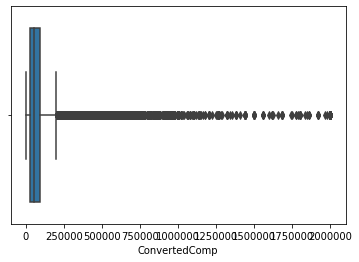

In [15]:
# checking outliers
sns.boxplot(data=salary_all,x=salary_all['ConvertedComp']);

In [19]:
Q1=salary_pro['ConvertedComp'].quantile(0.25)
Q3=salary_pro['ConvertedComp'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Upper_Whisker)

24468.0
95000.0
70532.0
200798.0


**Note** Salary is very highly right-skewed and also we don't know how conscious respondents have answered this question. I decided to group salaries for five categories: quantiles 0-25 (low), 25-75 (mid), 75-95 (high) and 95-100 (very high). This data frame is named salary_pro.

Also, the new data frame for salary was made by reducing the upper whisker. The method for reducing outliers is a common 1.5 x IQR rule. This data frame is named salary_range.

Exploring salary quantiles

In [34]:
salary_pro['ConvertedComp'].quantile(0.05)

5028.0

In [36]:
salary_pro.query('ConvertedComp < 5028')

,Respondent,MainBranch,Country,ConvertedComp,DevType,EdLevel,LanguageDesireNextYear,LanguageWorkedWith,Salary_groups
82,83,I am a developer by profession,Poland,3036.0,"Developer, back-end",Secondary school,C;JavaScript;Python;Ruby;Scala;TypeScript,C;C++;HTML/CSS;Python,low
122,124,I am a developer by profession,United States,0.0,"Designer;Developer, mobile",Bachelor’s degree,C++;Swift,Swift,low
320,322,I am a developer by profession,India,4188.0,Data scientist or machine learning specialist;...,Bachelor’s degree,HTML/CSS;JavaScript;PHP;SQL;TypeScript,HTML/CSS;JavaScript;PHP;SQL;TypeScript,low
487,489,I am a developer by profession,Kyrgyzstan,312.0,"Developer, full-stack;Developer, game or graphics",No formal education,PHP;VBA,PHP;VBA,low
550,552,I am a developer by profession,Turkey,575.0,"Developer, mobile",Bachelor’s degree,SQL,Objective-C;Swift,low
...,...,...,...,...,...,...,...,...,...
63964,65425,I am a developer by profession,Brazil,1489.0,"Developer, back-end;Developer, full-stack",Bachelor’s degree,NaN,NaN,low
64023,65487,I am a developer by profession,Brazil,828.0,"Developer, back-end;Developer, full-stack",Bachelor’s degree,NaN,NaN,low
64111,65584,I am a developer by profession,India,2508.0,"Developer, back-end",Bachelor’s degree,C#;HTML/CSS;JavaScript;SQL,C#;HTML/CSS;JavaScript;SQL,low
64121,65595,I am a developer by profession,"Venezuela, Bolivarian Republic of...",369.0,"Database administrator;Developer, back-end;Dev...",Some college/university,Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScri...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,low


In [56]:
salary_pro['ConvertedComp'].quantile(0.98)

911968.3199999939

In [59]:
salary_pro.query('ConvertedComp > 1900000')

,Respondent,MainBranch,Country,ConvertedComp,DevType,EdLevel,LanguageDesireNextYear,LanguageWorkedWith,Salary_groups
121,123,I am a developer by profession,United States,2000000.0,"Developer, back-end;Developer, full-stack",Bachelor’s degree,C;C++;Go;Kotlin;Rust,Bash/Shell/PowerShell;C++;Go;Java;Python,very_high
191,193,I am a developer by profession,United States,2000000.0,"Developer, mobile",Master’s degree,Objective-C;Swift,Java;JavaScript;Objective-C;Swift,very_high
194,196,I am a developer by profession,United States,1920000.0,Academic researcher;Data scientist or machine ...,Master’s degree,Go;HTML/CSS;Java;JavaScript;PHP;Python;R;SQL,Assembly;Bash/Shell/PowerShell;C;C++;Scala,very_high
663,665,I am a developer by profession,United States,2000000.0,"Developer, front-end",Bachelor’s degree,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Ruby,very_high
982,986,I am a developer by profession,United States,2000000.0,"Database administrator;Designer;Developer, bac...",Bachelor’s degree,C++;HTML/CSS;JavaScript;PHP;TypeScript,C;C++;HTML/CSS;Java;JavaScript;Objective-C;PHP...,very_high
...,...,...,...,...,...,...,...,...,...
61417,62660,I am a developer by profession,United States,2000000.0,"Developer, front-end;Developer, full-stack",Bachelor’s degree,Bash/Shell/PowerShell;Go;JavaScript;R;Rust;Typ...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...,very_high
63459,64874,I am a developer by profession,United States,2000000.0,Data scientist or machine learning specialist;...,Master’s degree,NaN,NaN,very_high
63890,65341,I am a developer by profession,United States,2000000.0,"Designer;Developer, back-end;Developer, deskto...",Some college/university,Dart;Go;HTML/CSS;JavaScript;Kotlin;Python;Ruby...,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,very_high
64035,65502,I am a developer by profession,United States,2000000.0,"Database administrator;Developer, back-end;Dev...",Associate degree,C#;Perl;Python,C#;HTML/CSS;JavaScript;Perl;Python;SQL;TypeScript,very_high


In [63]:
salary_pro.loc[64057][4]

'Data scientist or machine learning specialist;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;Engineer, data;Engineer, site reliability;Engineering manager'

#### Process salary groups

In [16]:
# salary groups for professionals
labels = ['low', "mid", 'high', 'very_high']
salary_pro['Salary_groups'] = pd.qcut(salary_pro['ConvertedComp'], q=[0, 0.25, 0.75, 0.95, 1], labels=labels)


In [20]:
# salary range: no lower bound, upper whisker for professionals
salary_range = salary_pro[salary_pro['ConvertedComp']< Upper_Whisker]

In [23]:
# salary range: groups for professionals
labels = ['low', "mid", 'high']
salary_range['Salary_groups'] = pd.qcut(salary_range['ConvertedComp'], q=[0, 0.25, 0.75, 1], labels=labels)


In [24]:
# setting dataframes for differnet salary groups for further analysis
sal_low = salary_pro.query('Salary_groups == "low"')
sal_mid = salary_pro.query('Salary_groups == "mid"')
sal_high = salary_pro.query('Salary_groups == "high"')
sal_very_high = salary_pro.query('Salary_groups == "very_high"')


In [25]:
# setting dataframes for differnet salary groups for further analysis
sal_low_range = salary_range.query('Salary_groups == "low"')
sal_mid_range = salary_range.query('Salary_groups == "mid"')
sal_high_range = salary_range.query('Salary_groups == "high"')


#### Education level: Exploring and preprocessing

In [26]:
# Education levels: encoding shorter values for plotting
params ={'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':'Bachelor’s degree',
         'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':'Master’s degree',
         'Some college/university study without earning a degree':'Some college/university',
         'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary school',
         'Associate degree (A.A., A.S., etc.)':'Associate degree',
         'Other doctoral degree (Ph.D., Ed.D., etc.)':'Other doctoral degree',
         'Professional degree (JD, MD, etc.)':'Professional degree',
         'I never completed any formal education':'No formal education',
         'Primary/elementary school':'Primary/elementary school'}

salary_pro = salary_pro.replace(params)
salary_range = salary_range.replace(params)
sal_very_high = sal_very_high.replace(params)


## 3. Study Questions

### Question 1. What are the most common languages used by professionals?

In this phase, I also checked all respondents and desired languages for next year.

Question for LanguageWorkedWith variable:
'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'


In [145]:
def display_chart(df, column, title ,color):
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    column: column you want to display
    color: color to have some variations for charts
    
    Returns:
    ------------------------
    ax: plot a chart with languages percentages for each bar 
    '''
    
    from matplotlib.ticker import StrMethodFormatter
    
    # number of respondents for this spesific colum
    respondents_count = df[column].value_counts().sum()
    # split column values
    ax = df[column].str.split(';', expand=True).stack().value_counts().plot(kind='barh', figsize=(15,10),
                                        color=color, fontsize=12);

    ax.set_title(title, fontsize=18)

    totals = []

    # values append to list
    for i in ax.patches:
        totals.append(i.get_width())

    total = sum(totals)

    # bar lables using above list
    for i in ax.patches:   
        ax.text(i.get_width()+500, i.get_y()+.38, \
            str(round((i.get_width()/respondents_count)*100, 1))+'%', fontsize=12,color='dimgrey')
    
    # largest on top 
    ax.invert_yaxis()

    # vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#999999', zorder=1)


    # x-axis label
    ax.set_xlabel('Respondents = {}, multiple-choice question'.format(respondents_count), labelpad=20, weight='bold', size=12);

    # y-axis label
    #ax.set_ylabel('Percentage of {}'.format(ylabel),labelpad=20, weight='bold', size=12);
    ax.set_ylabel(None)

    # Format x-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

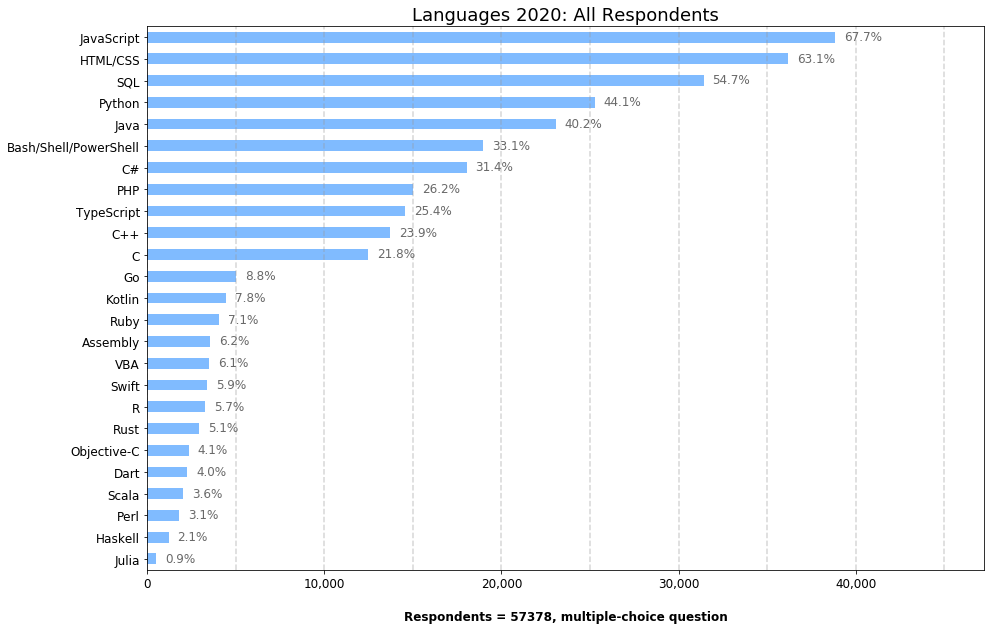

In [146]:
display_chart(lang_work, 'LanguageWorkedWith', 'Languages 2020: All Respondents','#80bbff')

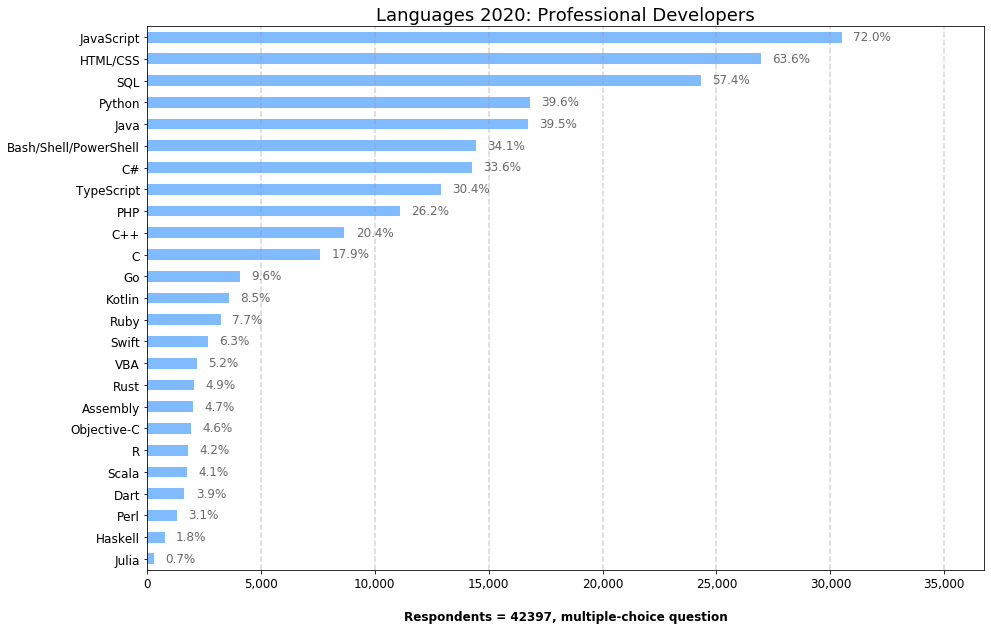

In [147]:
display_chart(lang_work_pro, 'LanguageWorkedWith', 'Languages 2020: Professional Developers','#80bbff')

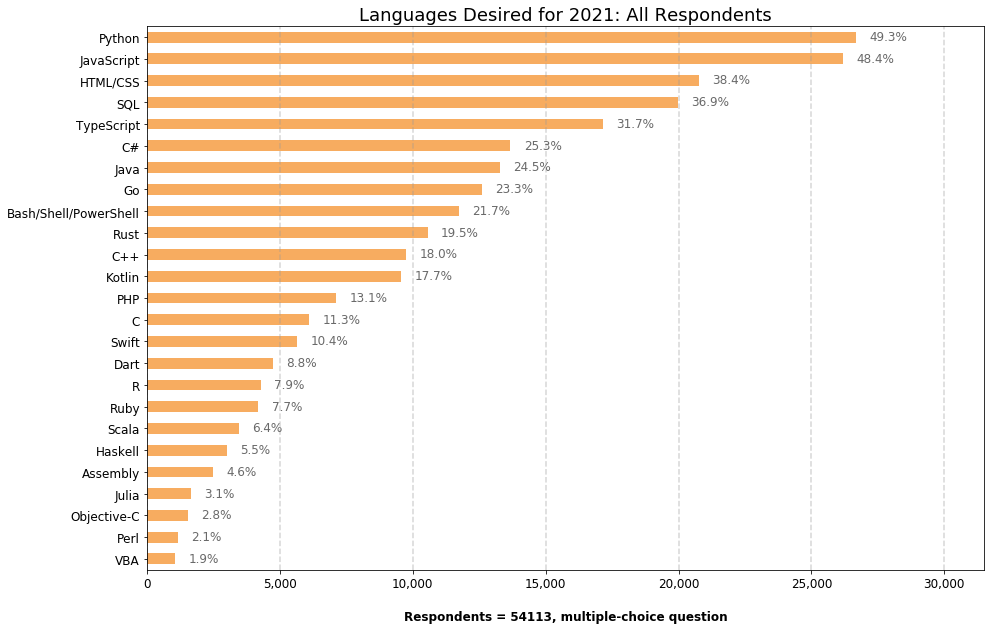

In [148]:
display_chart(lang_des, 'LanguageDesireNextYear', 'Languages Desired for 2021: All Respondents', '#f7ac60')

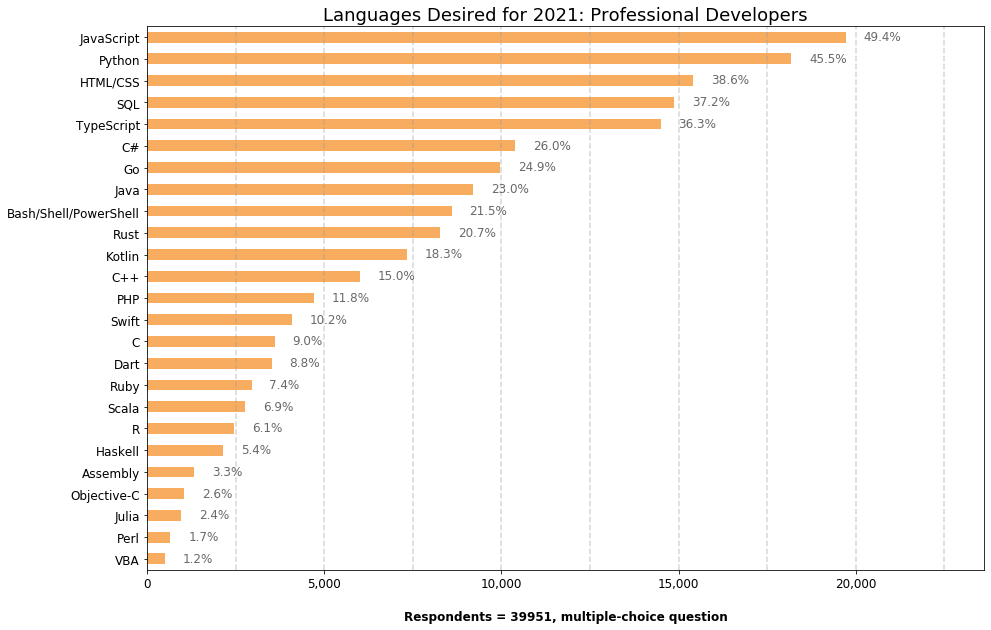

In [149]:
display_chart(lang_des_pro, 'LanguageDesireNextYear', 'Languages Desired for 2021: Professional Developers','#f7ac60')

Part one: What are the most common languages used by professionals?

This question follows the overall trends in recent years. From the chart below you can notice the Top 5 where JavaScript, HTML/CSS, SQL, Python, and Java are the most used working languages. The desired languages for next year raises TypeScript to fifth place. 


### Question 2. What is the average salary for each developer type?

This was a very interesting question. There were two main observations: Salary skewness and developer type combinations. Firstly, salary distribution is very high right-skewed. Salaries start from 0 and end up 2 million USD. Different countries have different salary levels and respondents have answered in different ways. For example, there are 313 respondents whose annual incomes are below 1000 USD and 1503 respondents whose annual incomes are below 5000 USD. Also, there are 1570 respondents whose annual incomes are in the range of 260k to 2m USD and 640 respondents whose annual incomes are in the range 900k to 2m USD. Secondly, respondents have given many combinations of developer types, actually, there were 8269 combinations of developer types. 

Salary is measured by variable ConvertedComp. This variable means that salary is converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks. 




In [103]:
def display_salary(df, column, title ,color):
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    column: the column name you want to look through
    title: title for the chart
    color: color to have some variations for charts
    
    Returns:
    ------------------------
    ax: plot a chart for each bar salary group 
    '''
    
    from matplotlib.ticker import StrMethodFormatter
    
    respondents_count = df[column].value_counts().sum()
    ax = df[column].value_counts().plot(kind='barh', figsize=(8,4),
                                        color=color, fontsize=12);
    ax.set_title(title, fontsize=14)
    
    '''
    ax.invert_yaxis()
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#999999', zorder=1)
    '''
    ax.invert_yaxis()
    ax.set_xlabel('Respondents = {}'.format(respondents_count), labelpad=20, weight='bold', size=12);
    ax.set_ylabel(None)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [96]:
# list of developer types
possible_vals = ['Developer, full-stack',
 'Developer, back-end',
 'Developer, front-end',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'DevOps specialist',
 'Database administrator',
 'System administrator',
 'Designer',
 'Developer, embedded applications or devices',
 'Developer, QA or test',
 'Data scientist or machine learning specialist',
 'Data or business analyst',
 'Engineer, data',
 'Academic researcher',
 'Engineering manager',
 'Educator',
 'Developer, game or graphics',
 'Product manager',
 'Engineer, site reliability',
 'Scientist',
 'Senior executive/VP',
 'Marketing or sales professional']

def total_count(df, col1, col2, look_for=None):
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    col1: the column name you want to look through
    col2: the column you want to count values from
    look_for: a list of strings you want to search for in each row of df[col];
    
    Returns:
    ------------------------
    new_df: a dataframe of each look_for with the count of how often it shows up
    '''
    
    from collections import defaultdict
    new_df = defaultdict(int)
    #loop through list of developer type
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df



In [97]:
# split developer types
def split_dev_types(df):
    devtypes = df['DevType'].value_counts().reset_index()
    devtypes.rename(columns={'index': 'DevType', 'DevType' : 'count'}, inplace=True)
    devtypes_df = total_count(devtypes, 'DevType', 'count',possible_vals)
    return devtypes_df
    

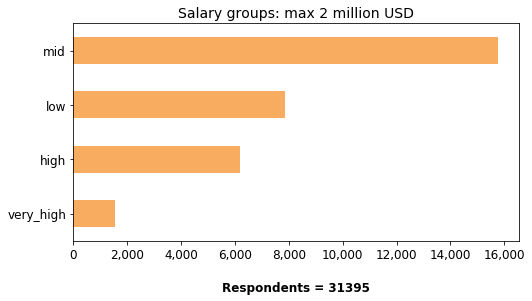

In [104]:
display_salary(salary_pro, 'Salary_groups', 'Salary groups: max 2 million USD','#f7ac60')

In [69]:
salary_pro.describe()

,Respondent,ConvertedComp
count,31395.000000,3.139500e+04
mean,29421.484727,1.024788e+05
std,18650.016042,2.235872e+05
min,8.000000,0.000000e+00
25%,13518.500000,2.446800e+04
50%,27144.000000,5.400000e+04
75%,47197.500000,9.500000e+04
max,65631.000000,2.000000e+06


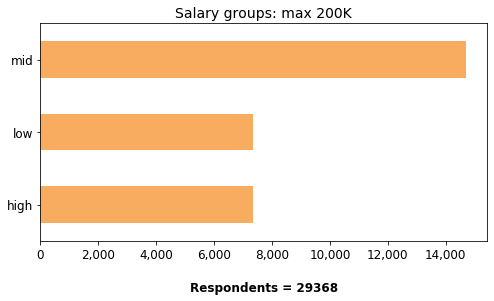

In [105]:
display_salary(salary_range, 'Salary_groups', 'Salary groups: max 200K','#f7ac60')

In [71]:
salary_range.describe()

,Respondent,ConvertedComp
count,29368.000000,29368.000000
mean,29430.613457,58691.748093
std,18602.142777,44639.665025
min,8.000000,0.000000
25%,13533.750000,22608.000000
50%,27156.000000,49704.000000
75%,47155.250000,84000.000000
max,65631.000000,200429.000000


In [72]:
# salary_pro: salary_pro filtered:'MainBranch == "I am a developer by profession"'
split_dev_types(salary_pro)

,DevType,count
0,"Developer, full-stack",18981
1,"Developer, back-end",18759
2,"Developer, front-end",12249
3,"Developer, desktop or enterprise applications",7953
4,"Developer, mobile",6113
5,DevOps specialist,4147
6,Database administrator,3520
9,"Developer, embedded applications or devices",3018
7,System administrator,2891
8,Designer,2879


**Note** Salary_pro is a data frame without any limits in upper bound (max ConvertedComp value is 2Milj USD).

**Note** Salary_pro investigated by four categories: low, mid, high, very high

In [73]:
split_dev_types(sal_low)

,DevType,count
1,"Developer, back-end",4723
0,"Developer, full-stack",4619
2,"Developer, front-end",3490
4,"Developer, mobile",2100
3,"Developer, desktop or enterprise applications",1835
6,Database administrator,956
8,Designer,909
9,"Developer, embedded applications or devices",686
7,System administrator,669
5,DevOps specialist,652


In [74]:
 split_dev_types(sal_mid)

,DevType,count
0,"Developer, full-stack",9573
1,"Developer, back-end",9366
2,"Developer, front-end",6024
3,"Developer, desktop or enterprise applications",4114
4,"Developer, mobile",2720
5,DevOps specialist,2175
6,Database administrator,1740
9,"Developer, embedded applications or devices",1505
7,System administrator,1495
8,Designer,1336


In [75]:
split_dev_types(sal_high)

,DevType,count
0,"Developer, full-stack",3876
1,"Developer, back-end",3741
2,"Developer, front-end",2164
3,"Developer, desktop or enterprise applications",1610
5,DevOps specialist,1113
4,"Developer, mobile",1024
15,Engineering manager,667
9,"Developer, embedded applications or devices",643
6,Database administrator,637
13,"Engineer, data",580


In [76]:
split_dev_types(sal_very_high)

,DevType,count
1,"Developer, back-end",929
0,"Developer, full-stack",913
2,"Developer, front-end",571
3,"Developer, desktop or enterprise applications",394
4,"Developer, mobile",269
5,DevOps specialist,207
6,Database administrator,187
9,"Developer, embedded applications or devices",184
8,Designer,164
7,System administrator,147


**Note** Salary range is a data frame, where the upper bound is limited by upper whisker (max ConvertedComp value is 200798$)

In [77]:
salary_range.describe()

,Respondent,ConvertedComp
count,29368.000000,29368.000000
mean,29430.613457,58691.748093
std,18602.142777,44639.665025
min,8.000000,0.000000
25%,13533.750000,22608.000000
50%,27156.000000,49704.000000
75%,47155.250000,84000.000000
max,65631.000000,200429.000000


In [78]:
split_dev_types(salary_range)

,DevType,count
0,"Developer, full-stack",17822
1,"Developer, back-end",17545
2,"Developer, front-end",11540
3,"Developer, desktop or enterprise applications",7443
4,"Developer, mobile",5761
5,DevOps specialist,3856
6,Database administrator,3289
9,"Developer, embedded applications or devices",2783
7,System administrator,2698
8,Designer,2673


**Note** Salary_range investigated by four categories: low, mid, high (there are no very high category)

In [79]:
split_dev_types(sal_low_range)

,DevType,count
1,"Developer, back-end",4397
0,"Developer, full-stack",4321
2,"Developer, front-end",3265
4,"Developer, mobile",1981
3,"Developer, desktop or enterprise applications",1696
6,Database administrator,894
8,Designer,850
9,"Developer, embedded applications or devices",653
7,System administrator,620
5,DevOps specialist,595


In [80]:
split_dev_types(sal_mid_range)

,DevType,count
0,"Developer, full-stack",8875
1,"Developer, back-end",8754
2,"Developer, front-end",5669
3,"Developer, desktop or enterprise applications",3833
4,"Developer, mobile",2605
5,DevOps specialist,1937
6,Database administrator,1628
7,System administrator,1384
9,"Developer, embedded applications or devices",1370
8,Designer,1276


In [81]:
split_dev_types(sal_high_range)

,DevType,count
0,"Developer, full-stack",4626
1,"Developer, back-end",4394
2,"Developer, front-end",2606
3,"Developer, desktop or enterprise applications",1914
5,DevOps specialist,1324
4,"Developer, mobile",1175
6,Database administrator,767
9,"Developer, embedded applications or devices",760
15,Engineering manager,711
7,System administrator,694


In [82]:
df = salary_pro
devtypes = df['DevType'].value_counts().reset_index()
devtypes.rename(columns={'index': 'DevType', 'DevType' : 'count'}, inplace=True)
devtypes_list_df = total_count(devtypes, 'DevType', 'count',possible_vals)

In [83]:
devtypes_list = devtypes_list_df['DevType'].tolist()

In [90]:
def compute_avg_salaries(developer_types, df, dev_type_col_name="DevType"):
    '''
    Parameters:
    ----------------------
    developer_types: list of strings for developer types
    df: dataframe to process salaries from
    dev_type_col_name: name of the column holding the developer type
    
    Returns:
    ------------------------
    data frame holding developer types and their average salaries
    '''
    
    avg_salaries_dct = {}
    for dt in developer_types:
        avg_salaries_dct[dt] = []

    for index in df.index:
        dev_types = df[dev_type_col_name][index].split(";")
        for dt in dev_types:
            dt = dt.strip()
            avg_salaries_dct[dt].append(df.ConvertedComp[index])
    
    _avg_salaries = {}
    for k, v in avg_salaries_dct.items():
        _avg_salaries[k] = round(np.mean(v))
    
    sorted_avg_salaries = [(k, v) for k, v in sorted(_avg_salaries.items(), key=lambda item: item[1])]
    
    developer_types_lst = [k for k, v in sorted_avg_salaries]
    avg_salaries_lst = [v for k, v in sorted_avg_salaries]
                                
    avg_salaries = pd.DataFrame()
    avg_salaries["DevType"] = developer_types_lst
    avg_salaries["ConvertedComp"] = avg_salaries_lst
    return avg_salaries

In [92]:
def display_salary_avg(df, title, group, color):
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    title: title for the chart
    group: the salary group we have made before
    color: color to have some variations for charts
    
    Returns:
    ------------------------
    ax: plot a chart with average salaries for each bar 
    '''
    
    respondents_count = len(df)
    
    df_avg = compute_avg_salaries(devtypes_list,df)
    df_avg_sort = df_avg.sort_values(by='ConvertedComp', ascending=False)
    plot = df_avg_sort.groupby(['DevType']).mean()['ConvertedComp'].sort_values()
    ax = plot.plot(kind='barh', figsize=(8,15),color=color, fontsize=14);
    
    ax.set_title(title + '\n Group {}: Respondents = {}'.format(group,respondents_count), fontsize=16)
    
    rects = ax.patches

    # place a label for bars
    for rect in rects:
        # x and y placement of label from rect
        x_value = rect.get_width().round()
        y_value = rect.get_y() + rect.get_height() / 2

        # number of points between bar and label
        space = 5
        # vertical alignment
        ha = 'left'

        # x value as label and format number
        label = '{:.0f}00'.format(x_value/100)

        # annotation
        plt.annotate(
            label,                     
            (x_value, y_value),         
            xytext=(space, 0),         
            textcoords='offset points', 
            va='center',
            fontsize = 14,
            color = 'dimgrey',
            ha=ha)                      
                                        
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.axes.get_xaxis().set_visible(False)
    
    ax.set_ylabel(None);
    

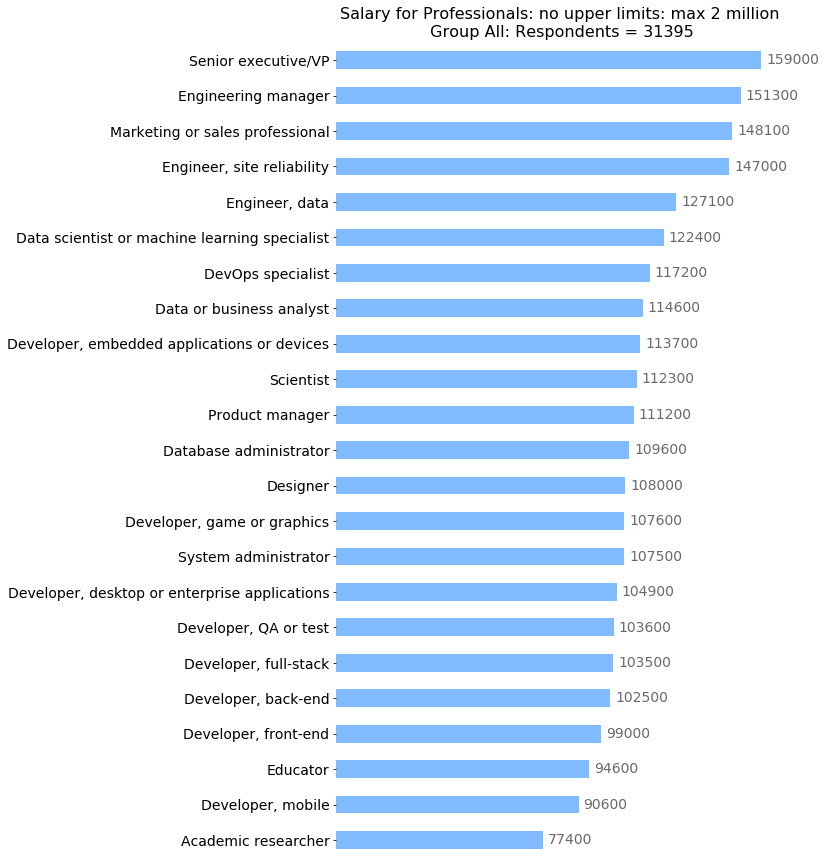

In [93]:
display_salary_avg(salary_pro, 'Salary for Professionals: no upper limits: max 2 million', 'All','#80bbff')

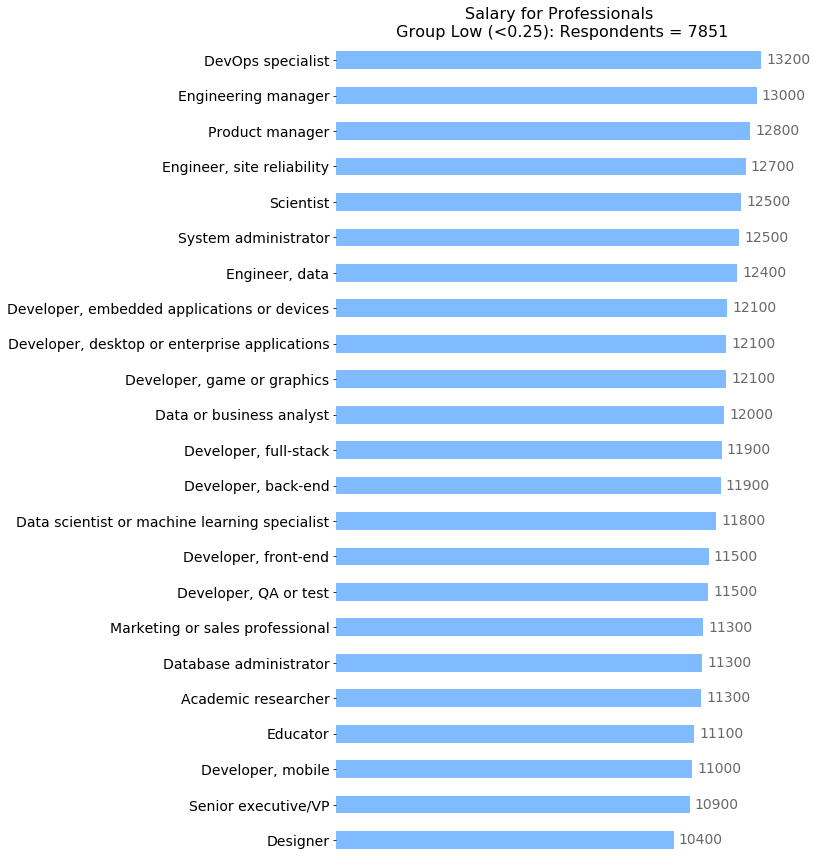

In [92]:
display_salary_avg(sal_low, 'Salary for Professionals','Low (<0.25)', '#80bbff')

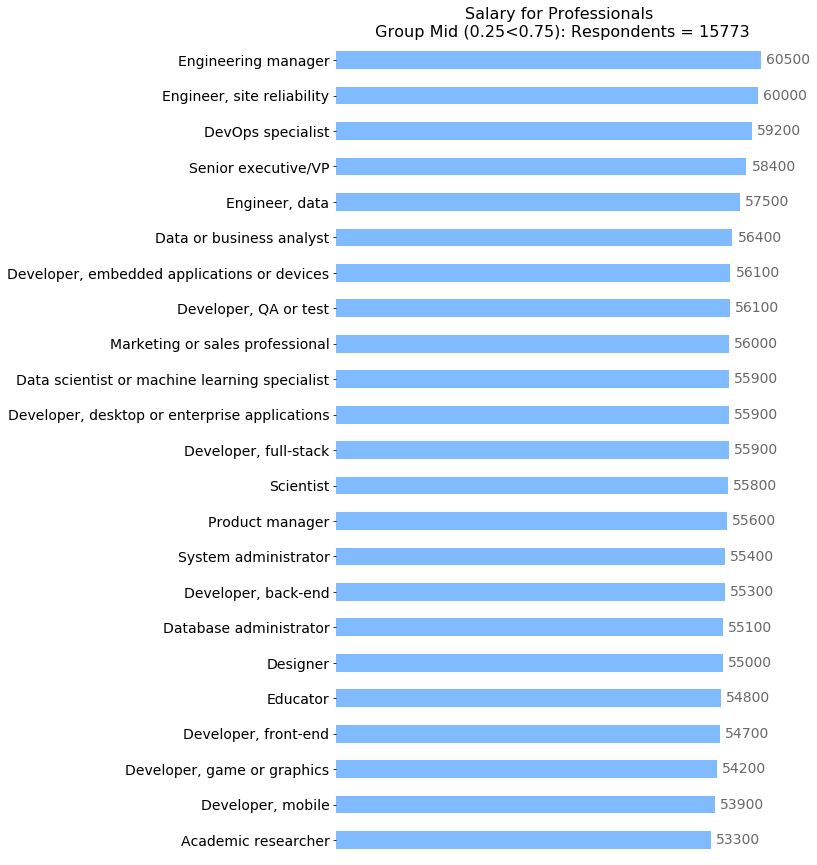

In [93]:
display_salary_avg(sal_mid, 'Salary for Professionals','Mid (0.25<0.75)', '#80bbff')

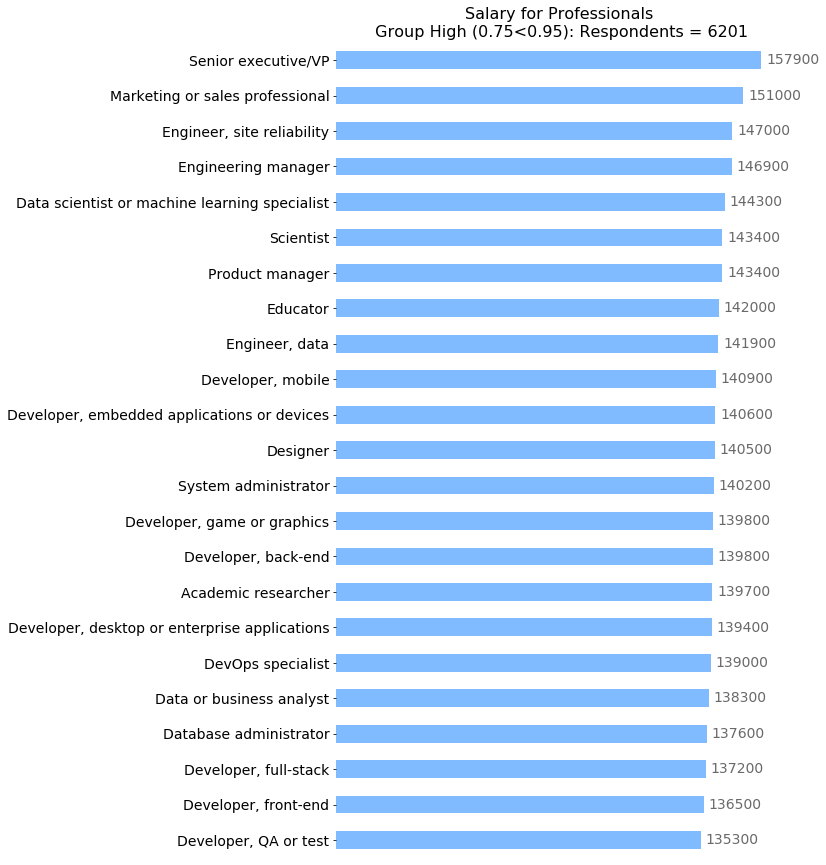

In [94]:
display_salary_avg(sal_high, 'Salary for Professionals','High (0.75<0.95)', '#80bbff')

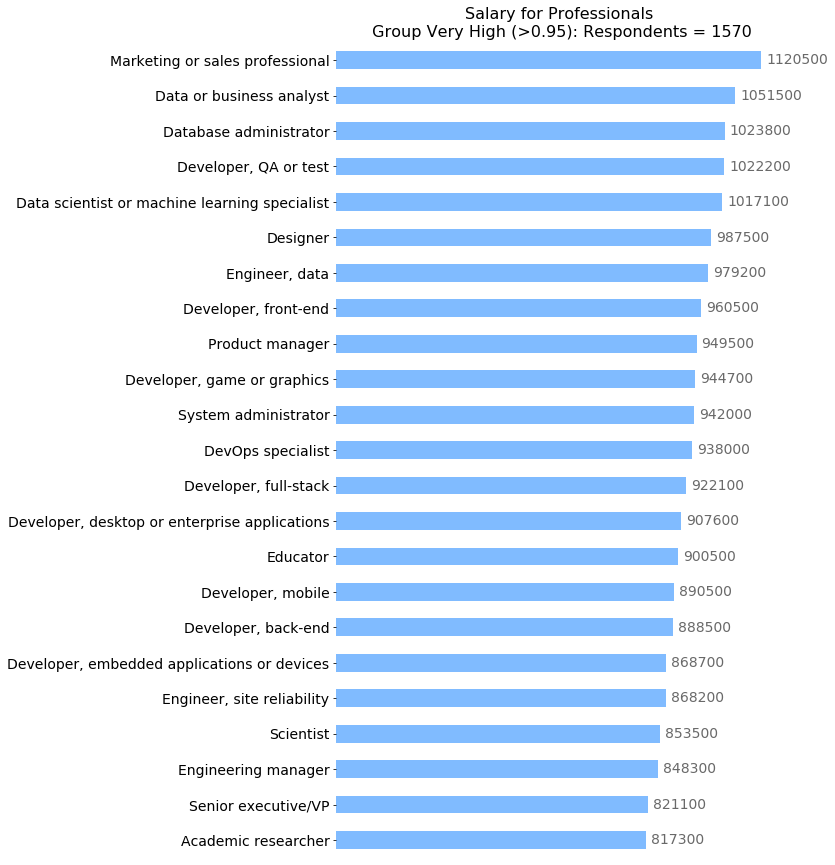

In [95]:
display_salary_avg(sal_very_high, 'Salary for Professionals','Very High (>0.95)', '#80bbff')

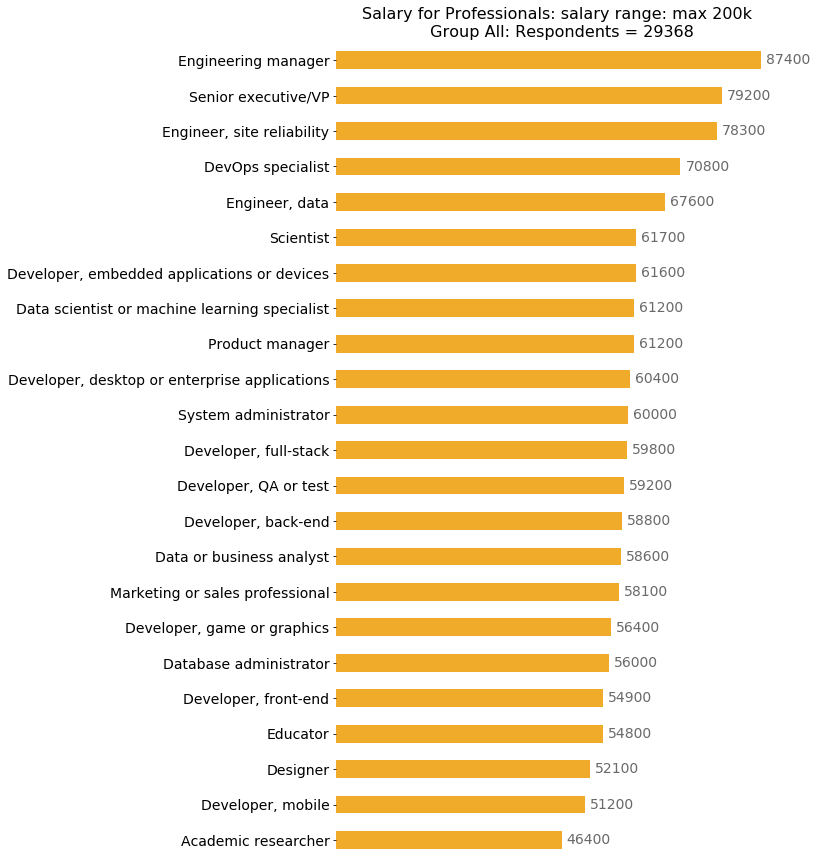

In [150]:
display_salary_avg(salary_range, 'Salary for Professionals: salary range: max 200k ', 'All','#f0ab2b')

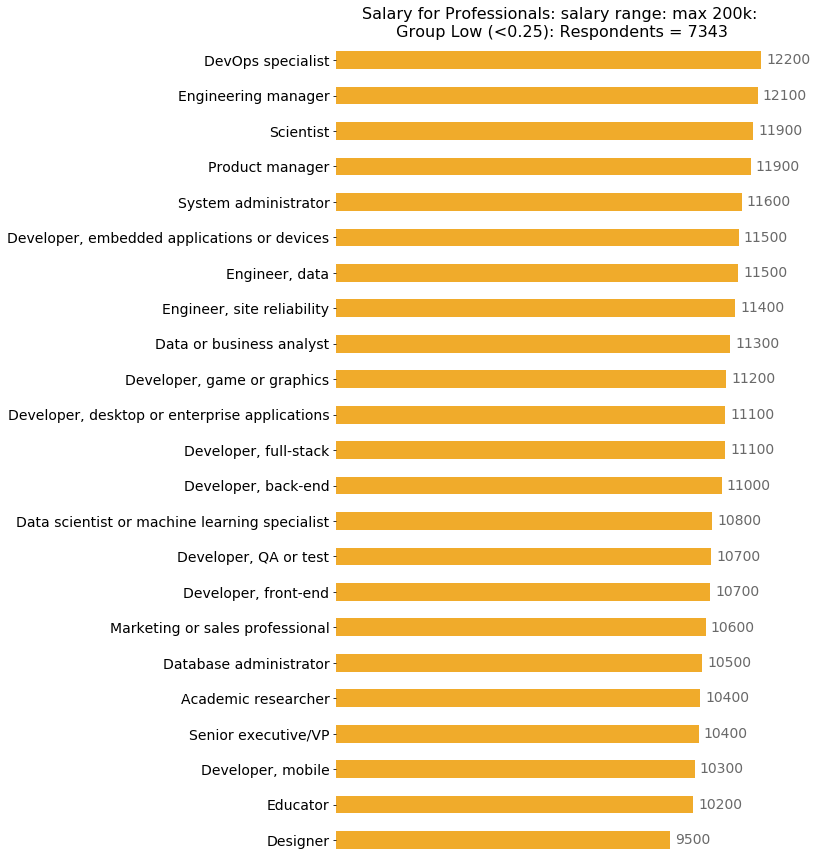

In [151]:
display_salary_avg(sal_low_range, 'Salary for Professionals: salary range: max 200k:','Low (<0.25)', '#f0ab2b')

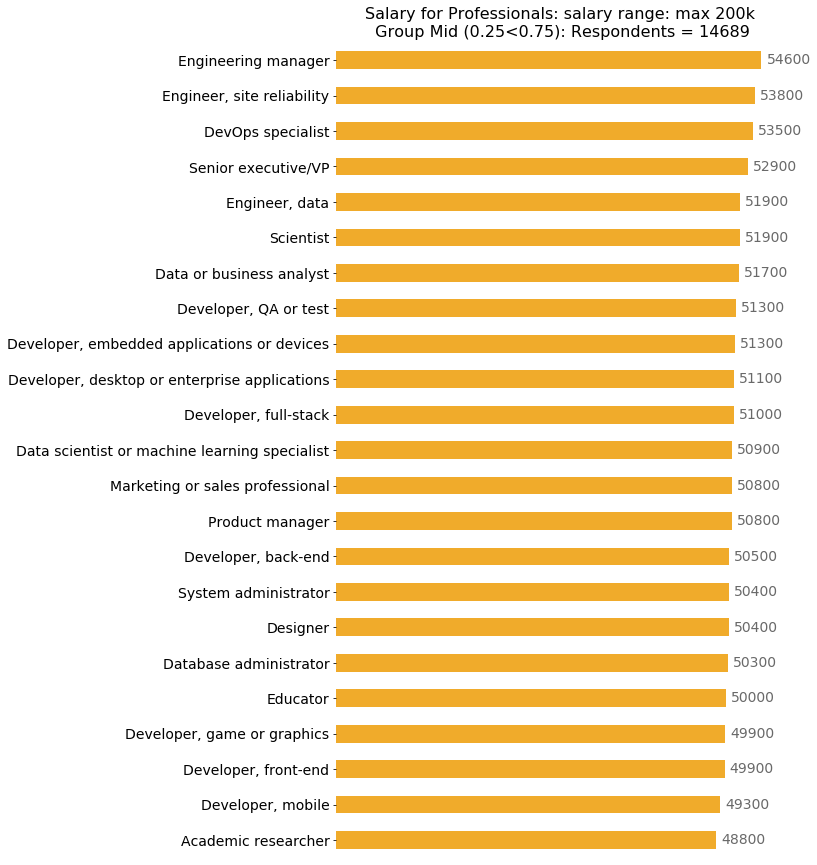

In [152]:
display_salary_avg(sal_mid_range, 'Salary for Professionals: salary range: max 200k','Mid (0.25<0.75)', '#f0ab2b')

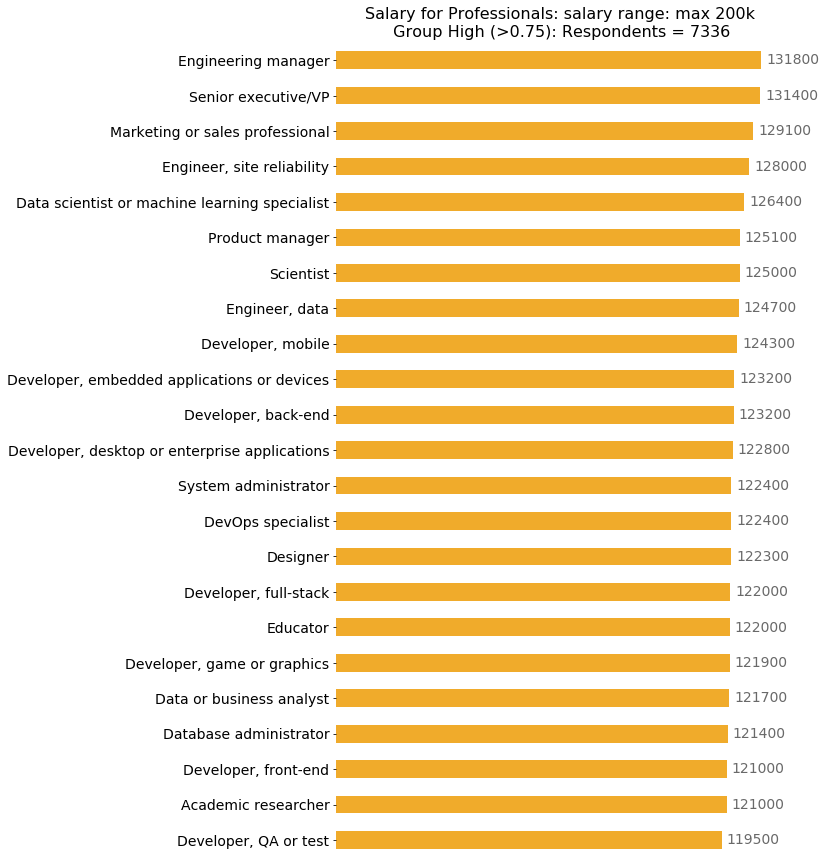

In [153]:
display_salary_avg(sal_high_range, 'Salary for Professionals: salary range: max 200k','High (>0.75)', '#f0ab2b')

Checking some developer type and how they are seen as a single value

In [129]:
mask = (salary_pro['DevType'].str.len() == 19)
se = salary_pro[mask]
se.query("DevType.str.contains('Senior executive/VP').values").count()

Respondent                24
MainBranch                24
Country                   24
ConvertedComp             24
DevType                   24
EdLevel                   24
LanguageDesireNextYear    20
LanguageWorkedWith        21
Salary_groups             24
dtype: int64

In [130]:
ms = salary_pro.query("DevType.str.contains('Marketing or sales professional').values")
mask = (ms['DevType'].str.len() == 31)
ms = ms[mask]
ms.query("DevType.str.contains('Marketing or sales professional').values").count()

Respondent                0
MainBranch                0
Country                   0
ConvertedComp             0
DevType                   0
EdLevel                   0
LanguageDesireNextYear    0
LanguageWorkedWith        0
Salary_groups             0
dtype: int64

From charts and tables above we can make some conclusions. Firstly, salaries for different developer types are very hard to identify because of respondents' multiple-choice answers. So how can you exactly tell, which salary is meant for each developer type? One respondent, whose annual incomes are 2m, answer for developer type is: Data scientist or machine learning specialist;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;Engineer, data;Engineer, site reliability;Engineering manager.


Secondly, average salaries depend on boundaries we have set. If we don’t set any lower or upper boundaries, we will get different types of charts as we have seen above. For example in professionals salary data, there are 651 Senior executive/VP’s and 24 of them are without combinations. Also there are 224 Marketing or sales professionals and all of them are in combinations with other developer types. These two types are also related to the highest salary category which we can see in salary groups. If we set upper bound for upper whisker (salary range chart, max 200k) we can see a different Top 5.  

Thirdly, different countries have different salary levels based on their gross domestic product. For this case, we could make normalization e.g. logarithmic transformations and/or relate this to countries GDP. This is another analysis to do. 



### Question 3. How does education compare to salary?

In [140]:
def display_edu_chart(df, column, title ,color):
    from matplotlib.ticker import StrMethodFormatter
    
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    column: the column name you want to look through
    title: title for the chart
    color: color to have some variations for charts
    
    Returns:
    ------------------------
    ax: plot a chart with percentages for each bar 
    '''
    # number of respondents for this spesific colum
    respondents_count = df[column].value_counts().sum()
    # split column values
    ax = df[column].str.split(';', expand=True).stack().value_counts().plot(kind='barh', figsize=(8,5),
                                        color=color, fontsize=12);

    ax.set_title(title, fontsize=16)

    totals = []

    # values append to list
    for i in ax.patches:
        totals.append(i.get_width())

    total = sum(totals)

    # bar lables using above list
    for i in ax.patches:   
        ax.text(i.get_width()+10, i.get_y()+.38, \
            str(round((i.get_width()/respondents_count)*100, 1))+'%', fontsize=14,color='dimgrey')
    
    # largest on top 
    ax.invert_yaxis()

    # vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#999999', zorder=1)


    # x-axis label
    ax.set_xlabel('Respondents = {}, multiple-choice question'.format(respondents_count), labelpad=20, size=12);

    # y-axis label
    #ax.set_ylabel('Percentage of {}'.format(ylabel),labelpad=20, weight='bold', size=12);
    ax.set_ylabel(None)

    # Format x-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [134]:
def display_edu_sal_avg(df, title, group, color):
    
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    title: title for the chart
    group: the salary group we have made before
    color: color to have some variations for charts
    
    Returns:
    ------------------------
    ax: plot a chart with average salaries for each bar 
    '''
    
    respondents_count = len(df)
    
    sal_by_edu = df.groupby(['EdLevel'])['ConvertedComp'].mean()
    sal_by_edu = sal_by_edu.sort_values(ascending=False)
    
    ax = sal_by_edu.plot(kind='barh', figsize=(8,5),color=color, fontsize=14);
    
    ax.set_title(title + '\n Group {}: Respondents = {}'.format(group,respondents_count), fontsize=16)
    
    rects = ax.patches

    # place a label for bars
    for rect in rects:
        # x and y placement of label from rect
        x_value = rect.get_width().round()
        y_value = rect.get_y() + rect.get_height() / 2

        # number of points between bar and label
        space = 5
        # vertical alignment
        ha = 'left'

        # x value as label and format number
        label = '{:.0f}00'.format(x_value/100)

        # annotation
        plt.annotate(
            label,                     
            (x_value, y_value),         
            xytext=(space, 0),         
            textcoords='offset points', 
            va='center',
            fontsize = 14,
            color = 'dimgrey',
            ha=ha)                      
                                      
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.invert_yaxis()
    ax.axes.get_xaxis().set_visible(False)
    ax.set_ylabel(None);
    

In [108]:
salary_pro['EdLevel'].value_counts()

Bachelor’s degree            15610
Master’s degree               7749
Some college/university       3707
Secondary school              1334
Associate degree              1058
Other doctoral degree          761
Professional degree            412
No formal education            138
Primary/elementary school      132
Name: EdLevel, dtype: int64

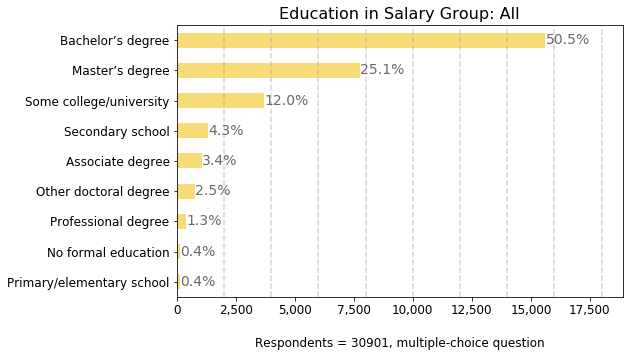

In [141]:
display_edu_chart(salary_pro, 'EdLevel', 'Education in Salary Group: All','#f7db77')

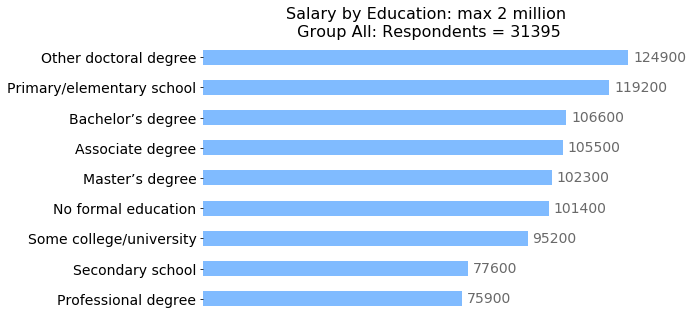

In [128]:
display_edu_sal_avg(salary_pro, 'Salary by Education: max 2 million', 'All','#80bbff')

In [129]:
salary_range['EdLevel'].value_counts()

Bachelor’s degree            14585
Master’s degree               7235
Some college/university       3487
Secondary school              1268
Associate degree              1009
Other doctoral degree          681
Professional degree            387
No formal education            129
Primary/elementary school      122
Name: EdLevel, dtype: int64

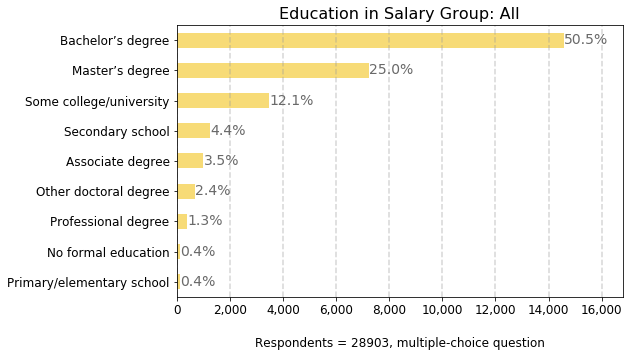

In [142]:
display_edu_chart(salary_range, 'EdLevel', 'Education in Salary Group: All','#f7db77')

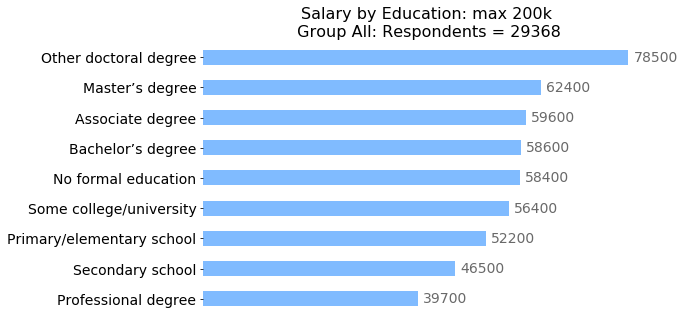

In [154]:
display_edu_sal_avg(salary_range, 'Salary by Education: max 200k', 'All','#80bbff')

In [133]:
sal_very_high['EdLevel'].value_counts()

Bachelor’s degree            804
Master’s degree              402
Some college/university      168
Other doctoral degree         50
Secondary school              48
Associate degree              41
Professional degree           19
Primary/elementary school      9
No formal education            7
Name: EdLevel, dtype: int64

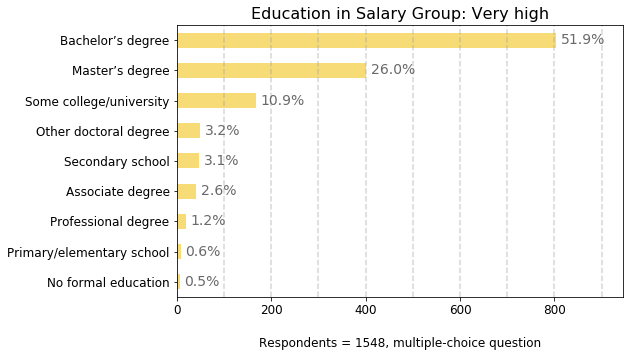

In [143]:
display_edu_chart(sal_very_high, 'EdLevel', 'Education in Salary Group: Very high','#f7db77')

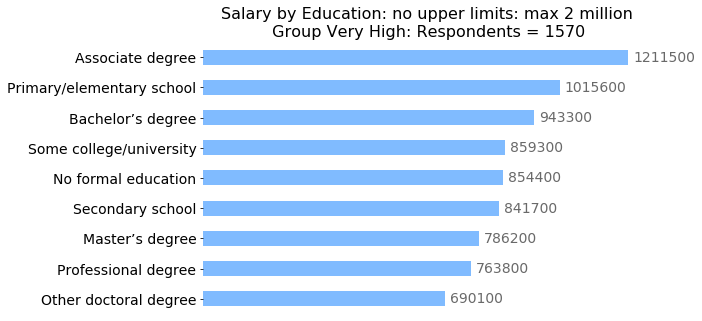

In [135]:
display_edu_sal_avg(sal_very_high, 'Salary by Education: no upper limits: max 2 million', 'Very High','#80bbff')

When we are exploring salaries by education, we have three salary data frames: salary_pro without upper bound (max value 2m USD), salary_range with upper bound (max value 200k), and salary group very high (range 263k to 2m USD). 

In the first chart where we have no upper bound, we can notice Top 5: Other doctoral degree (resp. 761, avg 125k), Primary/elementary school (resp.132, avg 120k), Bachelor’s degree (resp. 15610, avg 107k), Associate degree (resp. 1058, avg 106k) and Master’s degree (resp. 7749, avg 102k)

In the second chart, we have an upper bound 200K and we can notice another order in Top 5: Other doctoral degree (resp. 681, avg 79k), Master’s degree (resp. 7235, avg 62k), Associate degree (resp. 1009, avg 60k), Bachelor’s degree (resp. 14585, avg 59k) and No formal education (resp.129, avg 58k)

In the third chart, we have the highest salary group and there we can notice the third order in Top 5: Associate degree (resp. 41, avg 1.2m), Primary/elementary school (resp. 9, avg 1m), Bachelor’s degree (resp. 804, avg 943k), Some college/university (resp. 168, avg 859k), No formal education (resp.7, avg 854k)

So we have three different charts and which one is to be believed? If your education is Bachelor’s degree you will have a good chance to be a well-paid employer. Also, it was seen that without any higher or formal education you can also achieve a well-paid job, if we can rely on this data. 



## 4. Conclusions


Survey questions can be quite tricky to analyze. The more time you spend with data more deeply you’ll dive in. In this dataset, you can find so many ways to make better analyses. 

The languages study question was easy to answer and we could find the distribution over languages. Developers are constantly following technology trends and they have a good sense of what is coming in the future. In 2020 the Top 5 working languages were JavaScript, HTML/CSS, SQL, Python, and Java. The desired languages for next year raises TypeScript to fifth place.

Salaries for different developer types are very hard to identify because of respondents' multiple-choice answers and it is hard to tell, which salary is meant for each developer type. Average salaries depend on the boundaries we have set. If we don’t set any lower or upper boundaries, we will get different types of charts as we have seen above. Different countries have different salary levels based on their gross domestic product. In this case, we could have other methods to analyze and this is another story.

When we were comparing education to salary we noticed the same thing with salary data. If we set or don’t set boundaries or we don’t take care of countries' salary levels, our conductions can be biased. In this study we had three different charts for Salary by Education, depending on the items mentioned above. We had three different charts and which one is to be believed? If your education is Bachelor’s degree you will have a good chance to be a well-paid employer. Also, it was seen that without any higher or formal education you can also achieve a well-paid job if we can rely on this data. 

Overall Stack Overflows public survey is a good material for data scientists to examine and practice highly needed skills. 
